In [9]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(20,10)
%matplotlib inline
import seaborn as sns
sns.set_style("dark")

# EDA

In [3]:
df = pd.read_csv('../kaggle/train.csv')
df.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0


In [4]:
df['diagnosis'].value_counts()

unknown                               27124
nevus                                  5193
melanoma                                584
seborrheic keratosis                    135
lentigo NOS                              44
lichenoid keratosis                      37
solar lentigo                             7
atypical melanocytic proliferation        1
cafe-au-lait macule                       1
Name: diagnosis, dtype: int64

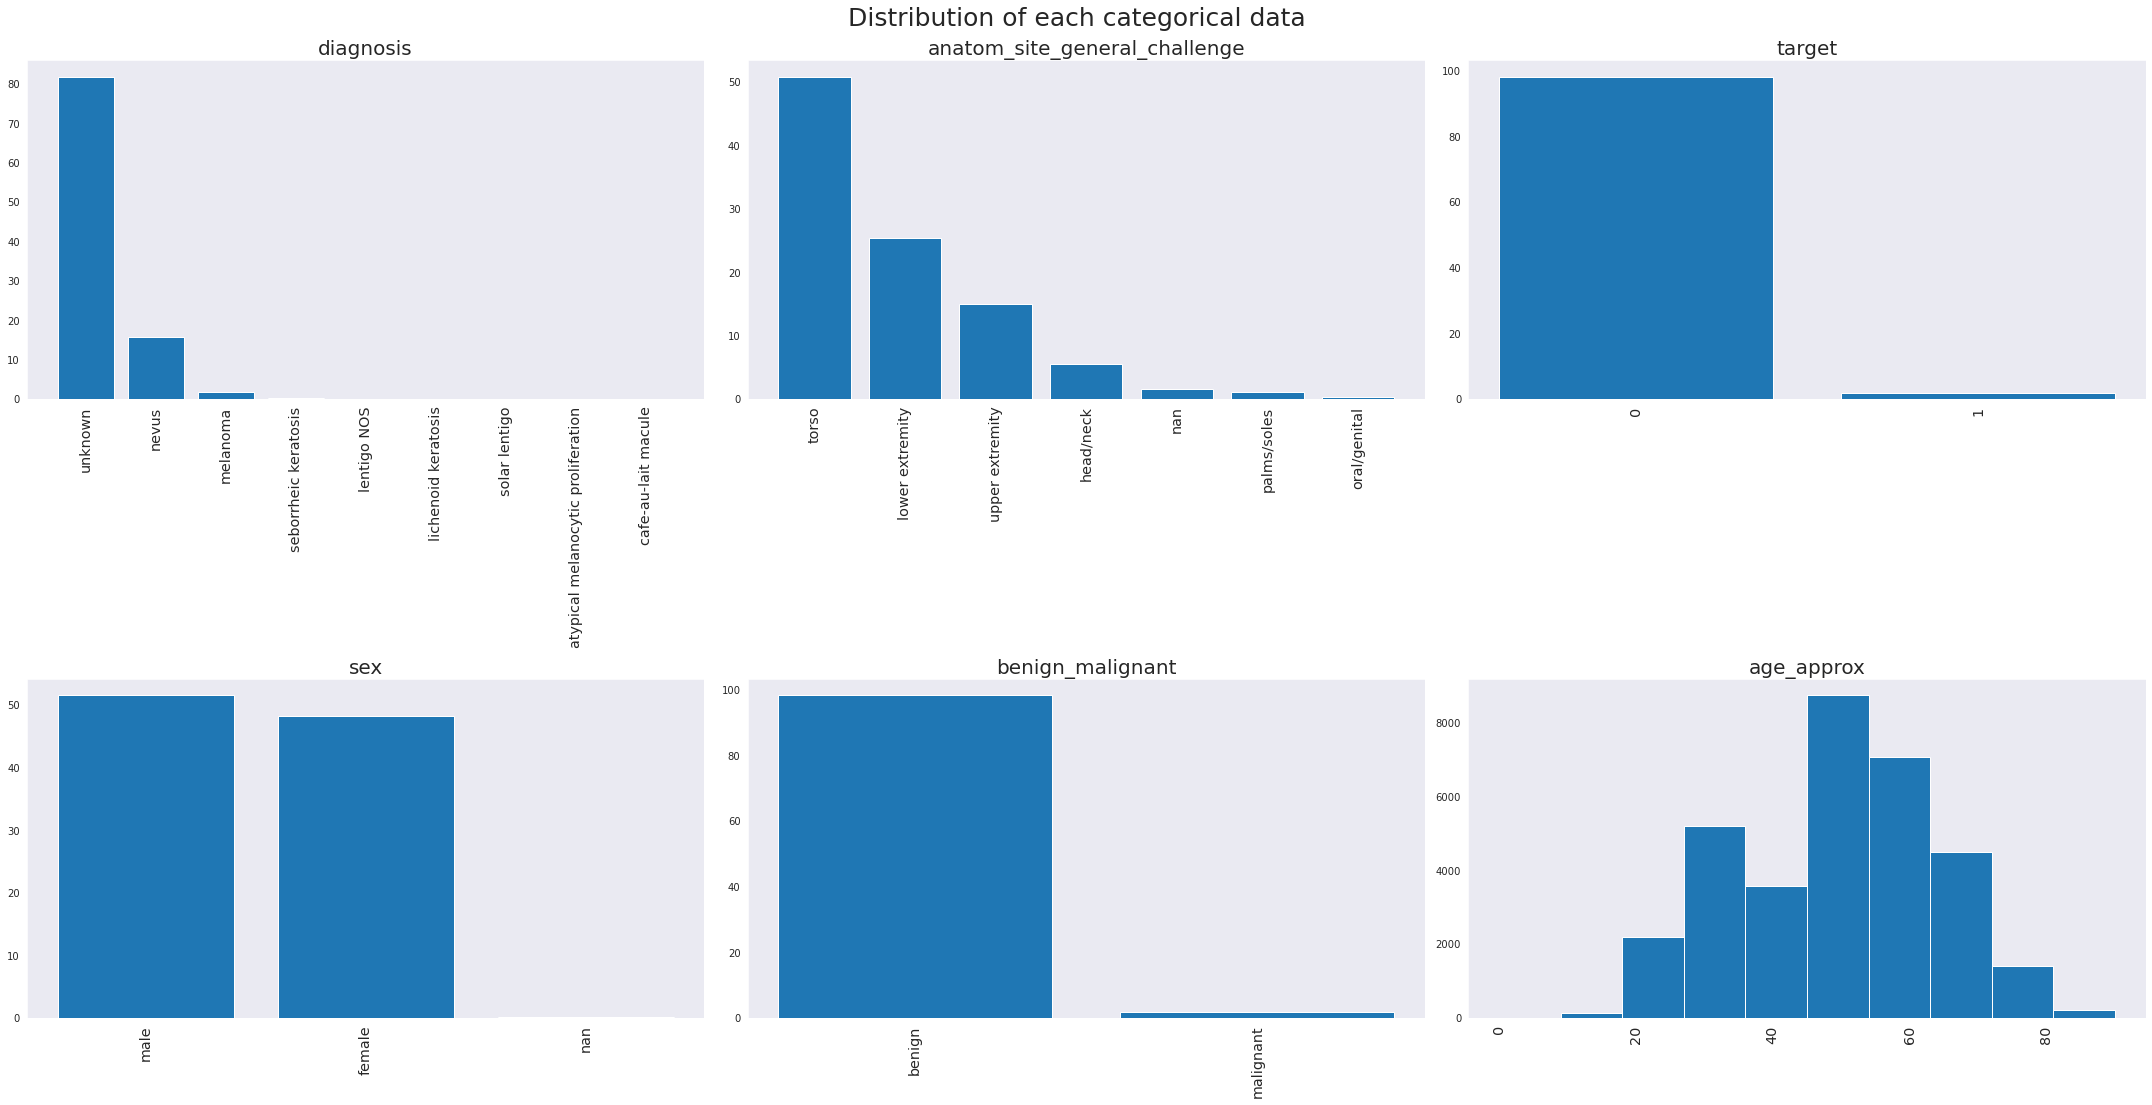

In [6]:
categorical_cols = ['diagnosis','sex','anatom_site_general_challenge','benign_malignant','target']

fig,ax = plt.subplots(2,(len(categorical_cols)+1)//2,figsize=(30,15))

ratio = {}
for i,col in enumerate(categorical_cols+['age_approx']):
    ratio[col] = 100*df[col].value_counts(dropna=False)/df[col].value_counts(dropna=False).sum()
    if i==5:
        ax[1][2].hist(df['age_approx'])     
    else:
        ax[i%2][i//2].bar([str(x) for x in ratio[col].index],height=ratio[col])
    ax[i%2][i//2].set_title(col,fontdict={'fontsize':20})
    for tick in ax[i%2][i//2].get_xticklabels():
        tick.set_rotation(90)
        tick.set_fontsize('x-large')

fig.suptitle('Distribution of each categorical data',y=1.02,fontsize=25)
fig.tight_layout()

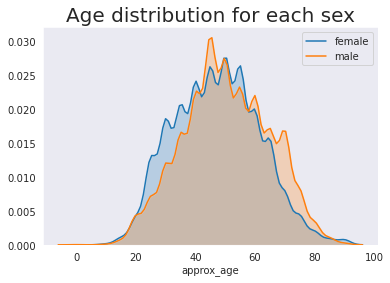

In [10]:
sex_c = df['sex'].value_counts()
sex_c = sex_c.sort_index()
fig,ax = plt.subplots() 
for idx in sex_c.index:
    sns.kdeplot(df.loc[df['sex']==idx,'age_approx'],shade=True,ax=ax)
ax.legend(sex_c.index)
ax.set_title('Age distribution for each sex',fontsize=20)
res = ax.set_xlabel('approx_age')

/home/a.khamutov/miniconda3/envs/pt/lib/python3.7/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/a.khamutov/miniconda3/envs/pt/lib/python3.7/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


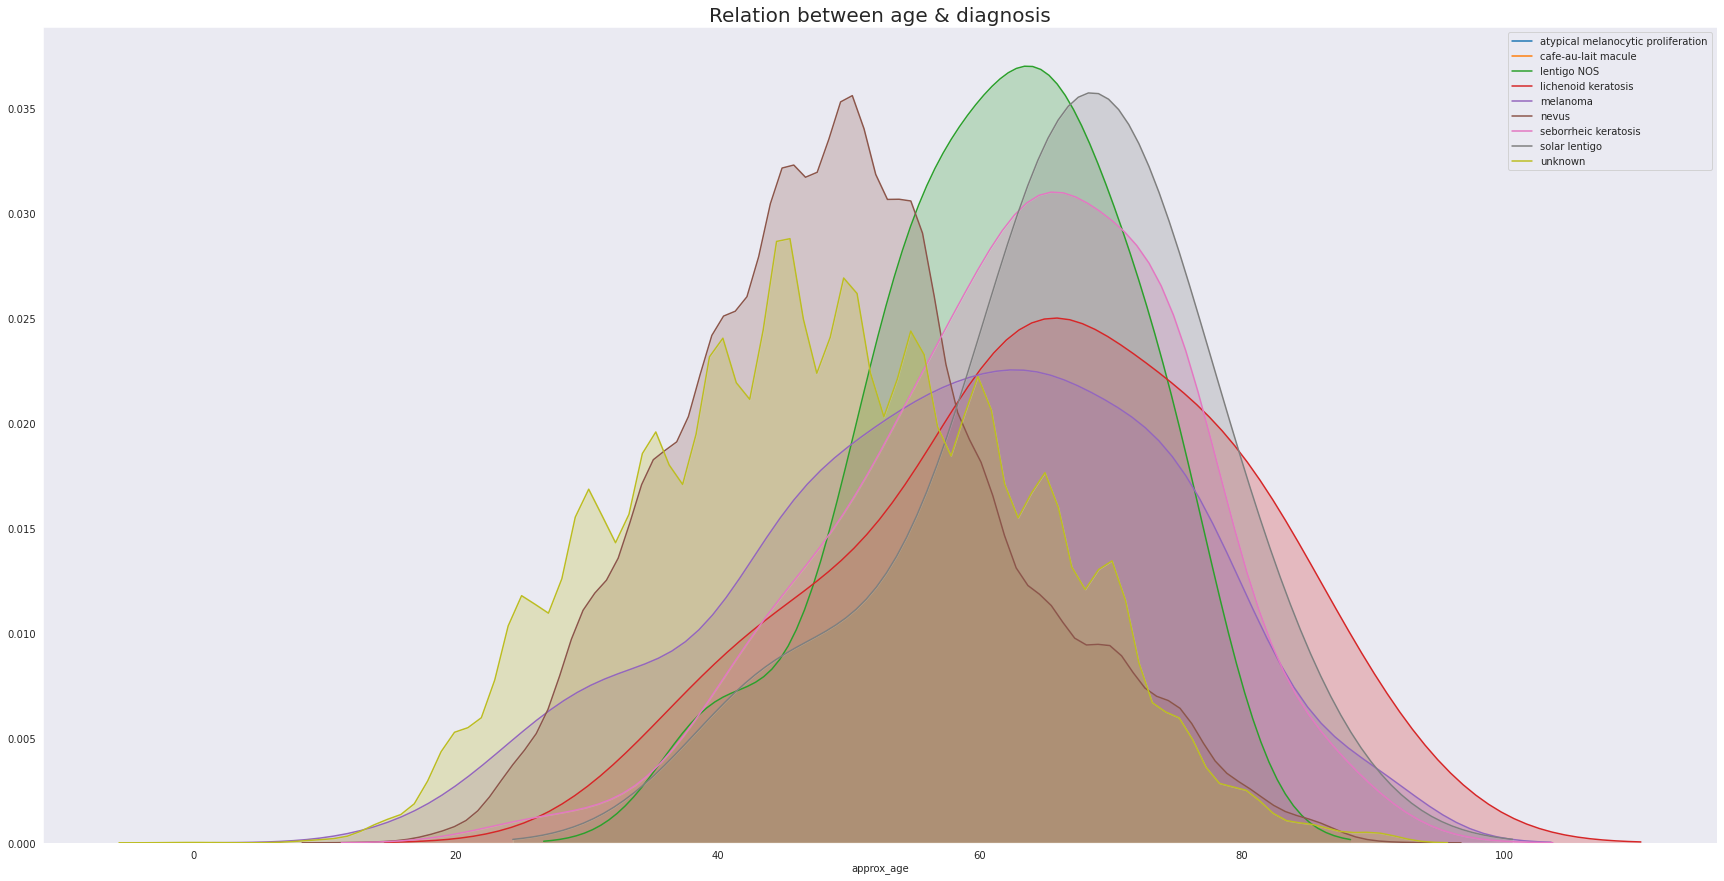

In [13]:
diag_c = df['diagnosis'].value_counts()
diag_c = diag_c.sort_index()
fig,ax = plt.subplots(figsize=(30,15)) 
for idx in diag_c.index:
    sns.kdeplot(df.loc[df['diagnosis']==idx,'age_approx'],shade=True,ax=ax)
ax.legend(diag_c.index)
ax.set_title('Relation between age & diagnosis',fontsize=20)
res = ax.set_xlabel('approx_age')

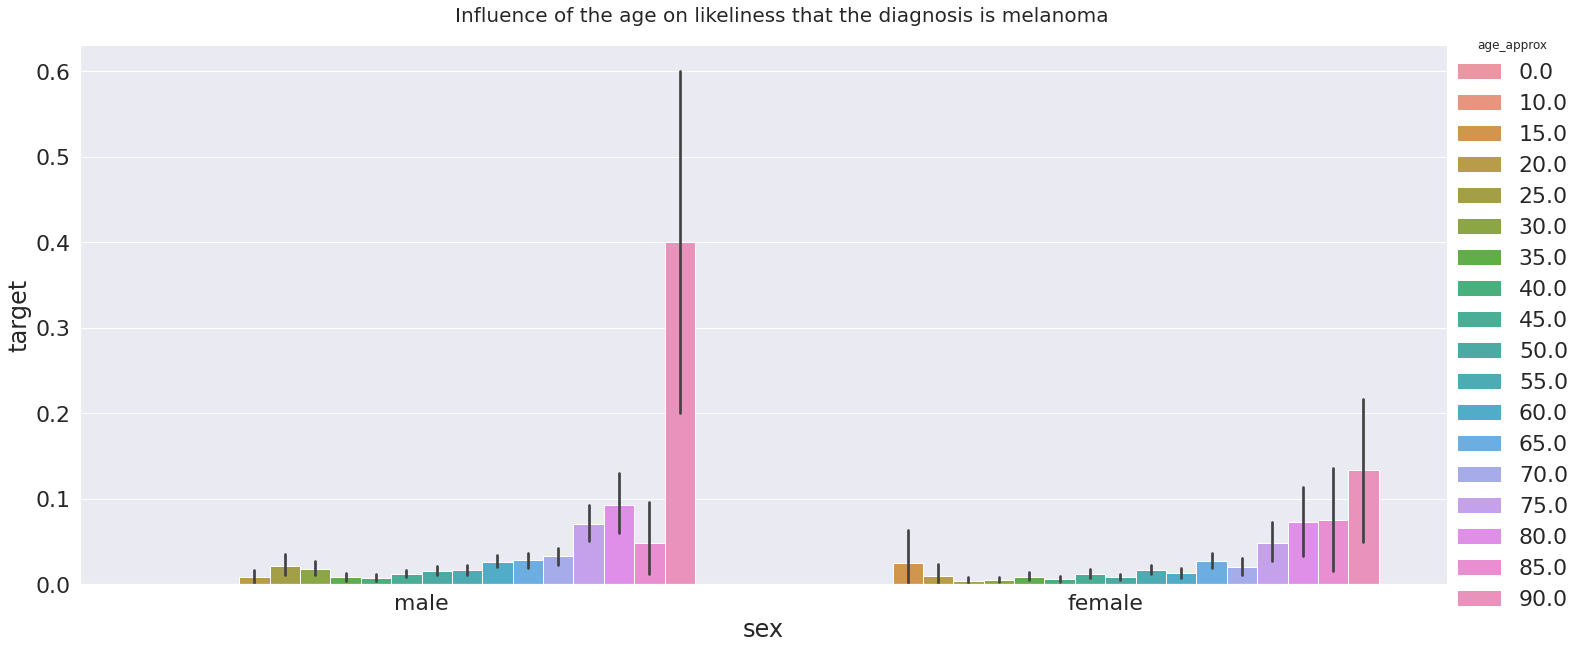

In [18]:
sns.set(font_scale=2)
ax = sns.catplot(x="sex",
            y="target",
            kind="bar",
            hue='age_approx',
            data=df,
            height=9, 
            aspect=2.3);
_=ax.fig.suptitle('Influence of the age on likeliness that the diagnosis is melanoma',y=1.02, fontsize=20)

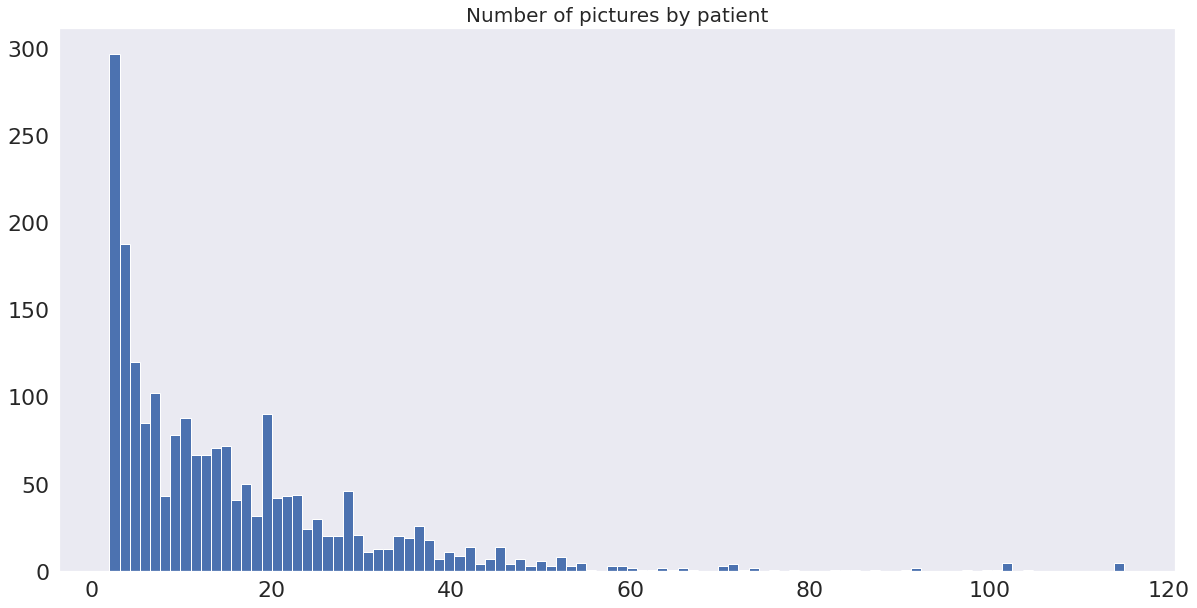

In [20]:
fig, ax = plt.subplots(figsize=(20,10))
df.groupby('patient_id').count()['image_name'].hist(ax=ax,bins=100)
ax.set_title('Number of pictures by patient', fontsize=20)
ax.grid(False)

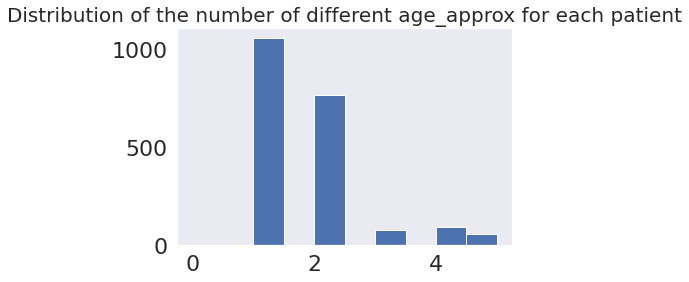

In [22]:
ax= df.groupby('patient_id').aggregate({'age_approx':pd.Series.nunique}).hist()[0][0]
ax.set_title('Distribution of the number of different age_approx for each patient',fontsize=20)
ax.grid(False)